# Data Process  (Data_processing_with_Pandas_v1.ipynb)
## datetime, dropna, concat, filtering if else, join

In [ ]:
df=pd.DataFrame({"A":[1,5,10],"B":[2,6,11],"C":[3,None,12],
                "D":[4,8,None],"E":["Y","N","Y"],
                "F":["11/27/2017 17:00:00","11/26/2017 18:00:00","11/25/2017 20:00:00"]})

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df["F"]=pd.to_datetime(df["F"],format="%m/%d/%Y %H:%M:%S")

In [ ]:
df["G"]=df["F"].dt.date  #<-- dt.date , dt.hour , dt.minute

In [ ]:
df["G"]=pd.to_datetime(df["G"],format="%Y-%m-%d")

In [ ]:
#Note you need to assign the result to another variable
df=df.dropna(axis=0)    # <-- remove row with Null

In [ ]:
df3=pd.concat([df1,df2],axis=1)   #<-- concat two dataframe together

In [ ]:
df3=df3[["Default","Name","Income","Age"]] # add column index

In [ ]:
df3["Age_Group"]=np.where(df3.Age>=40,"M","Y")   # <-- Add column where Age>=40 is M, otherwise is Y

In [ ]:
df3["Age_Group"]=["Y" if i<40 else "M" for i in df3.Age ]   #another way to write if ... else

In [ ]:
df3.drop(["Age_Group"],axis=1,inplace=True)   #<-- remove column

In [ ]:
df5=pd.merge(left=df3,right=df4,how="left",left_on="Name",right_on="Name")  # <-- Left Join merge

In [ ]:
df5=pd.merge(left=df3,right=df4,how="inner",left_on="Name",right_on="Name")    # <-- Inner Join merge and leave matched here

# Data Collection  (Data_collection_answer_v2.ipynb)
## import yfinance, investing.com, resample, 
## pandas, numpy, datetime, matplotlib.pyplot, sys

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

In [ ]:
import sys
!{sys.executable} -m pip install yfinance

# Yahoo Finance

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
data = yf.download('^HSI','2019-01-01')

In [ ]:
data = yf.download('^HSI','2019-01-01')
data.Close.plot()
plt.show()

In [ ]:
data["return"]=data["High"]-data["Low"]

In [ ]:
data["return"].describe()

In [ ]:
data["Date"]=data.index
data["Week"]=data["Date"].dt.week
data["Month"]=data["Date"].dt.month

In [ ]:
data_weekly=data.groupby(["Week"]).agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last','Volume':'sum'})
data_weekly.index=data_weekly["Date"]

In [ ]:
def data_resample3Days(data,time_start=None,time_end=None):
    df=data.loc[time_start:time_end].copy()
    OPEN=df["Open"].resample("3D").first()
    HIGH=df["High"].resample("3D").max()
    LOW=df["Low"].resample("3D").min()
    CLOSE=df["Close"].resample("3D").last()
    df1=pd.concat([OPEN, HIGH,LOW,CLOSE], axis=1, keys=["Open","High","Low","Close"])     #<-- Resample and concat together
    return(df1)

data_resample3Days(data).head()

# Investing.com

In [ ]:
import investpy as ipy

In [ ]:
df2 = ipy.get_stock_historical_data(stock="0700", country='hong kong', from_date="01/01/2019",to_date="31/12/2019")

In [ ]:
i="0700.HK"

df1=yf.download(i,start="2019-01-01",end="2019-12-31")["Close"]
df2 = ipy.get_stock_historical_data(stock=i[:-3], country='hong kong', from_date="01/01/2019",to_date="31/12/2019")["Close"]
df3=pd.DataFrame({"investing_Close":df2,"yahoo_Close":df1})

df3["Stock_code"]=i
df3["diff"]=df3["investing_Close"]-df3["yahoo_Close"]
NA=sum(df3["diff"].isna())
NA

# Data Visualization (Data Visualization_students_v8.ipynb)
pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

In [ ]:
import sys
!{sys.executable} -m pip install yfinance

In [ ]:
import sys
!{sys.executable} -m pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

In [ ]:
import matplotlib.pyplot as plt     #<-- IMPORTANT
import yfinance as yf

In [ ]:
data = yf.download('^HSI','2019-01-01')

In [ ]:
data["Date"]=data.index    #<-- add index

In [ ]:
data=data[["Date","Open","High","Low","Close","Volume"]]     #<-- only use these column headers

### Line Chart

f1, ax = plt.subplots(figsize = (15,10))  #<-- plot the graph size 
ax.plot(data["Date"],data["Close"],color="blue",label="Close",linewidth=1)  #<-- X-axis, Y-axis
ax.plot(data["Date"],data["High"],color="red",label="High",linewidth=1)    #<-- plot another line
ax.grid(True)
ax.legend()
plt.show()

In [ ]:
f1, ax1 = plt.subplots(figsize = (15,10))
data["Close"].plot(kind="line",ax=ax1,color="black",label="Close",grid=True)
plt.show()                                

### Line and bar chart (volume) together

In [ ]:
fig = plt.figure(figsize = (15,10))

ax1 = plt.subplot2grid((5,4), (0,0), rowspan=4, colspan=4)          #<-- .subplot2grid plot 2 graphes
ax1.plot(data["Date"],data["Close"],color="blue",label="Close",linewidth=1)
ax1.grid(True)

ax1v = plt.subplot2grid((5,4), (4,0), sharex=ax1, rowspan=1, colspan=4)             #<-- share x-axis
ax1v.axes.yaxis.set_ticklabels(["Volume"])
#ax1v.grid(False)
#ax1v.set_ylim(0, data["Volume"].max())

plt.setp(ax1.get_xticklabels(), visible=False)
ax1v.bar(data["Date"],data["Volume"])                                     #<-- graph type
plt.subplots_adjust(hspace=0)
#ax1.legend(loc="upper left")

plt.show()

In [ ]:
fig = plt.figure(figsize = (15,10))

ax1 = plt.subplot2grid((4,1), (0,0), rowspan=2, colspan=1)
ax1.plot(data["Date"],data["Close"],color="blue",label="Close",linewidth=1)  #line 1
ax1.grid(True)

ax1r = plt.subplot2grid((4,1), (2,0), rowspan=1, colspan=1)
ax1r.plot(data["Date"],data["GAP"],color="red",label="GAP",linewidth=1)     #line 2
ax1r.grid(True)

ax1v = plt.subplot2grid((4,1), (3,0), rowspan=1, colspan=1)
ax1v.axes.yaxis.set_ticklabels(["Volume"])            #set y-axis as volume and bar chart
ax1v.grid(False)
#ax1v.set_ylim(0, data["Volume"].max())
ax1v.bar(data["Date"],data["Volume"],label="Volume")

ax2=ax1v.twinx()                                       #twinx() plot ax2 at same graph as ax1v
ax2.plot(data["Date"],data["Close"],color="red",label="Close",linewidth=1)    

plt.subplots_adjust(hspace=0)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1r.get_xticklabels(), visible=False)
ax1.legend(loc="upper left")
ax1r.legend(loc="upper left")
ax1v.legend(loc="upper left")

plt.show()

### Box 

In [ ]:
data["Close"].plot(kind="box",title="Distribution of close price of HSI",figsize=(15,10))
plt.show()                                                            #plot candle stick "box"

In [ ]:
f1, ax = plt.subplots(figsize = (15,10))
ax.boxplot(data["Close"])
plt.show()

### Volatity Comparison in Chart

In [ ]:
data["Close"].pct_change().head()              #<-- .pct_change()

In [ ]:
data["Close"].pct_change().rolling(window=10).std().plot(figsize=(16,4))
plt.show()                                   #<-- rolling(window=10)

In [ ]:
data["Volatity"]=data["Close"].pct_change().rolling(window=10).std()  #<-- standard deviation (volatity)

In [ ]:
fig = plt.figure(figsize = (15,10))

ax1 = plt.subplot2grid((4,1), (0,0), rowspan=2, colspan=1)                                  #Close price line chart
ax1.plot(data["Date"],data["Close"],color="blue",label="Close",linewidth=1)
ax1.grid(True)

ax1r = plt.subplot2grid((4,1), (2,0), rowspan=1, colspan=1)                                  #Volatity line chart
ax1r.plot(data["Date"],data["Volatity"],color="red",label="Volatity",linewidth=1)
ax1r.grid(True)

ax1v = plt.subplot2grid((4,1), (3,0), rowspan=1, colspan=1)                                  #Volume bar chart
ax1v.axes.yaxis.set_ticklabels(["Volume"])
ax1v.grid(False)
#ax1v.set_ylim(0, data["Volume"].max())
ax1v.bar(data["Date"],data["Volume"],label="Volume")

ax2=ax1v.twinx()                                                                #twinx() Close price line chart in volume chart
ax2.plot(data["Date"],data["Close"],color="red",label="Close",linewidth=1)

plt.subplots_adjust(hspace=0)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1r.get_xticklabels(), visible=False)
ax1.legend(loc="upper left")
ax1r.legend(loc="upper left")
ax1v.legend(loc="upper left")

plt.show()

In [ ]:
# Case 2 Compare HSI 700 939 volatity

In [ ]:
df_HSI=yf.download("^HSI","2019-01-01")                                         #download data
df_0700HK=yf.download("0700.HK","2019-01-01")
df_0939HK=yf.download("0939.HK","2019-01-01")

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(16,4))                           #plot 3 volatity lines 
fig.suptitle('Volatity analysis', size=20, y=1.02)

df_HSI["Close"].pct_change().rolling(window=10).std().plot(kind='line',color="black", ax=ax1,label="HSI")
df_0700HK["Close"].pct_change().rolling(window=10).std().plot(kind='line',color="red", ax=ax1,label="0700.HK")
df_0939HK["Close"].pct_change().rolling(window=10).std().plot(kind='line',color="green",ax=ax1,label="0939.HK")

ax1.legend()
plt.show()

### Candlestick 
(pip install mpl_finance)

In [ ]:
import sys
!{sys.executable} -m pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

In [ ]:
from mpl_finance import candlestick_ohlc #<-- import candlestick_ohlc
import matplotlib.dates as mdates       #<-- import matplotlib.dates as mdates
%matplotlib inline

In [ ]:
ohlc= data[['Date', 'Open', 'High', 'Low','Close',"Volume"]].copy()
ohlc.head()

In [ ]:
ohlc["Date"] = ohlc["Date"].apply(mdates.date2num)   # .apply(matplotlib.dates.date2num)

In [ ]:
f1, ax = plt.subplots(figsize = (15,10))          # <-- plot candlestick, defline colordown='red'

candlestick_ohlc(ax, ohlc.values, width=0.8, colorup='green', colordown='red')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax.grid(True)
plt.show()

## d/l data, define data, from xxx to yyy, plot line

### Method 1   Volatity, from date to date

In [ ]:
data = yf.download('^HSI','2019-01-01')

In [ ]:
data["Date"]=data.index
data["Volatity"]=data["Close"].pct_change().rolling(window=10).std()

In [ ]:
data1=data[["Date","Open","High","Low","Close","Volume","Volatity"]].loc["2019-01-01":"2019-03-01"].copy()
ohlc=data1.copy()
ohlc["Date"] = ohlc["Date"].apply(mdates.date2num)

In [ ]:
fig = plt.figure(figsize = (15,10))

ax1 = plt.subplot2grid((4,1), (0,0), rowspan=2, colspan=1)
candlestick_ohlc(ax1, ohlc.values, width=0.8, colorup='green', colordown='red')  <-- X-axis, Y-axis

#ax1.plot(data["Date"],data["Close"],color="blue",label="Close",linewidth=1)   <-- Line Chart same as above candlestick
#ax1.grid(True)

ax1r = plt.subplot2grid((4,1), (2,0), rowspan=1, colspan=1)
ax1r.plot(data1["Date"],data1["Volatity"],color="red",label="Volatity",linewidth=1)
ax1r.grid(True)

ax1v = plt.subplot2grid((4,1), (3,0), rowspan=1, colspan=1)
ax1v.axes.yaxis.set_ticklabels(["Volume"])                     #set y-axis as volume and bar chart
ax1v.grid(False)
#ax1v.set_ylim(0, data["Volume"].max())
ax1v.bar(data1["Date"],data1["Volume"],label="Volume")

ax2=ax1v.twinx()                                             #twinx() plot ax2 at same graph as ax1v
ax2.plot(data1["Date"],data1["Close"],color="red",label="Close",linewidth=1)

plt.subplots_adjust(hspace=0)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1r.get_xticklabels(), visible=False)

#ax1.legend(loc="upper left")
ax1r.legend(loc="upper left")
ax1v.legend(loc="upper left")

plt.show()

### Method 2

In [ ]:
from mpl_finance import candlestick2_ohlc

In [ ]:
data=data.loc["2020-01-01":].copy()                   # <-- from 1/1/2020 to latest

f1, ax4 = plt.subplots(figsize = (15,10))

ax4.set_xticks(range(0, len(data.index), 5))
ax4.set_xticklabels(data.index[::5].strftime("%Y-%m-%d"))       # <-- shrftime

candlestick2_ohlc(ax4, opens=data["Open"], highs=data["High"], lows=data["Low"], closes=data["Close"],
                  width=0.5, colorup="forestgreen", colordown="firebrick", alpha=1)
plt.xticks(rotation=90)                                               # <-- rotation of label 
plt.show()

### Method 3  Correlation Analysis Dollar Index vs Gold vs HSI

In [ ]:
df_dollar=yf.download("DX-Y.NYB","2019-01-01")                           # <-- Data: Dollar Index
df_dollar.tail()
df_dollar["Date"]=df_dollar.index

In [ ]:
df_gold=yf.download("GC=F","2019-01-01")                           # <-- Data: Gold
#df_gold=yf.download("2840.HK","2019-01-01")
df_gold["Date"]=df_gold.index

In [ ]:
f1, ax = plt.subplots(figsize = (15,10))

ax.plot(data["Date"],data["Close"],color="blue",label="HSI",linewidth=1)
ax1=ax.twinx()
ax1.plot(df_dollar["Date"],df_dollar["Close"],color="red",label="Dollar",linewidth=1)

ax.grid(True)
ax.legend()
ax1.legend(loc="lower right")
plt.show()

In [ ]:
f1, ax = plt.subplots(figsize = (15,10))

ax.plot(df_gold["Date"],df_gold["Close"],color="blue",label="Gold",linewidth=1)
ax1=ax.twinx()
ax1.plot(df_dollar["Date"],df_dollar["Close"],color="red",label="Dollar",linewidth=1)

ax.grid(True)
ax.legend()
ax1.legend(loc="lower right")
plt.show()

# Import and plot graph

In [21]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt 
import matplotlib.dates as mdates       
%matplotlib inline

import sys
!{sys.executable} -m pip install yfinance
import sys
!{sys.executable} -m pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

import investpy as ipy     # <-- pip install investpy
import yfinance as yf      # <-- pip install yfinance
from mpl_finance import candlestick_ohlc #<-- import candlestick_ohlc

  Using cached https://github.com/matplotlib/mpl_finance/archive/master.zip
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-py3-none-any.whl size=8429 sha256=e4dffbfe94b94fe0a0e3ac62ec5312625e0a0b6ce75f443e8bb40425bf005bca
  Stored in directory: C:\Users\user\AppData\Local\Temp\pip-ephem-wheel-cache-anqi5sn2\wheels\eb\17\99\0f3929e635912eb25fc346aaf43b4ee3da4a80dee8ce3d2e4f
Successfully built mpl-finance


In [63]:
df_dollar=yf.download("DX-Y.NYB","2019-01-01")
df_gold=yf.download("GC=F","2019-01-01")
df_hsi=yf.download("^HSI","2019-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [64]:
df_dollar["Date"]=df_dollar.index
df_gold["Date"]=df_gold.index
df_hsi["Date"]=df_hsi.index

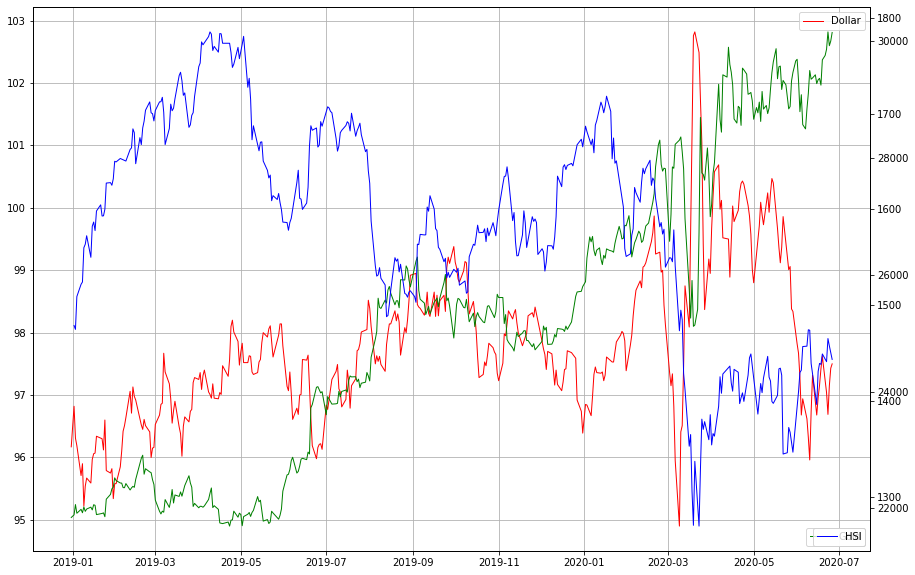

In [73]:
f1, ax = plt.subplots(figsize = (15,10))

ax.plot(df_dollar["Date"],df_dollar["Close"],color="red",label="Dollar",linewidth=1)
ax1=ax.twinx()
ax1.plot(df_gold["Date"],df_gold["Close"],color="green",label="Gold",linewidth=1)
ax2=ax.twinx()
ax2.plot(df_hsi["Date"],df_hsi["Close"],color="blue",label="HSI",linewidth=1)

ax.grid(True)
ax.legend()
ax1.legend(loc="lower right")
ax2.legend(loc="lower right")
plt.show()

In [37]:
df_2840=yf.download("2840.HK","2019-01-01")

[*********************100%***********************]  1 of 1 completed


In [66]:
df_gold["Date"]=df_gold.index
df_2840["Date"]=df_2840.index

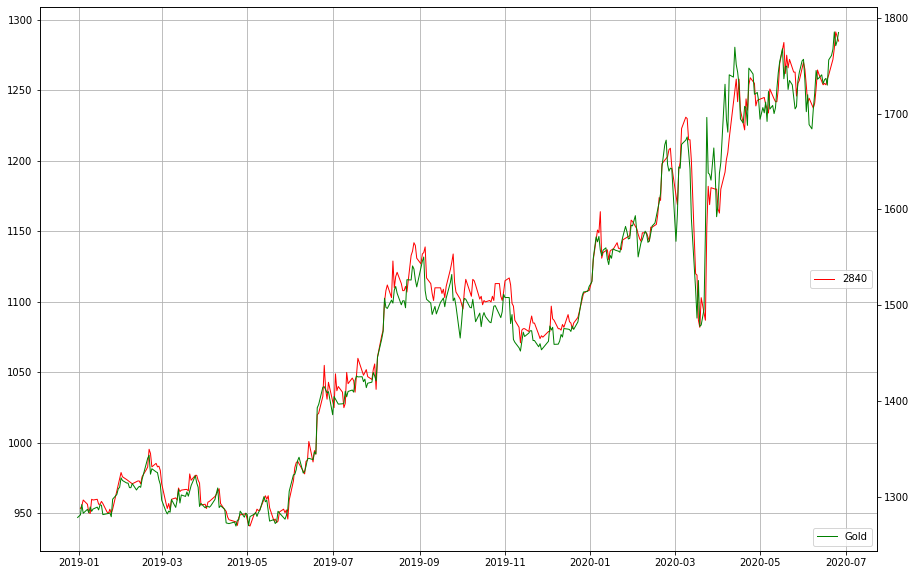

In [69]:
f1, ax = plt.subplots(figsize = (15,10))

ax.plot(df_2840["Date"],df_2840["Close"],color="red",label="2840",linewidth=1)
ax1=ax.twinx()
ax1.plot(df_gold["Date"],df_gold["Close"],color="green",label="Gold",linewidth=1)

ax.grid(True)
ax.legend(loc="right")
ax1.legend(loc="lower right")

plt.show()

In [ ]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
%matplotlib inline

In [ ]:
ohlc= data[['Date', 'Open', 'High', 'Low','Close',"Volume"]].copy()
ohlc["Date"] = ohlc["Date"].apply(mdates.date2num)   # .apply(matplotlib.dates.date2num)

f1, ax = plt.subplots(figsize = (15,10))          # <-- plot candlestick, defline colordown='red'

candlestick_ohlc(ax, ohlc.values, width=0.8, colorup='green', colordown='red')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax.grid(True)
plt.show()

data = yf.download('^HSI','2019-01-01')

data["Date"]=data.index
data["Volatity"]=data["Close"].pct_change().rolling(window=10).std()

data1=data[["Date","Open","High","Low","Close","Volume","Volatity"]].loc["2019-01-01":"2019-03-01"].copy()
ohlc=data1.copy()
ohlc["Date"] = ohlc["Date"].apply(mdates.date2num)

[*********************100%***********************]  1 of 1 completed


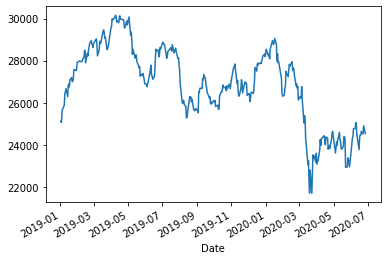

In [26]:
data = yf.download('^HSI','2019-01-01')
data.Close.plot()
plt.show()